In [85]:
import sys
import pandas as pd
import json
from dc_vae import DCVAE
from utils import set_index, preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

In [5]:
#Data train
path = "/home/gastong/Documentos/TELCO/v0/"
filenames = ["TELCO_data_2021_01.zip", "TELCO_data_2021_02.zip", "TELCO_data_2021_03.zip"]
labels_filenames = ["TELCO_labels_2021_01.zip", "TELCO_labels_2021_02.zip", "TELCO_labels_2021_03.zip"]

data_train = pd.DataFrame()
labels_train = pd.DataFrame()

for i in range(3):
    data_train = pd.concat([data_train, pd.read_csv(path+filenames[i])])
    labels_train = pd.concat([labels_train, pd.read_csv(path+labels_filenames[i])])

In [6]:
data_train = set_index(data_train)
data_train = preprocessing(dataRaw=data_train, flag_scaler=False, scaler=None, scaler_name=None,
                  outliers=True, max_std=7, instance='fit')

labels_train = set_index(labels_train)
labels_train = preprocessing(dataRaw=labels_train, flag_scaler=False, scaler=None, scaler_name=None,
                  outliers=False, max_std=7)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 12)]    0                                            
______________________________________________________________________________________

2022-12-14 15:54:05.920146: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-14 15:54:05.952171: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699850000 Hz


645/645 [==============================] - 32s 46ms/step - loss: 33.2820 - reconst: 12.8617 - kl: 2.3804 - val_loss: 5.5956 - val_reconst: 3.2620 - val_kl: 2.3336

Epoch 00001: val_loss improved from inf to 5.59565, saving model to first_test_best_model.h5
Epoch 2/100
645/645 [==============================] - 29s 44ms/step - loss: 4.8172 - reconst: 2.3490 - kl: 1.9529 - val_loss: 3.4315 - val_reconst: 1.8332 - val_kl: 1.5983

Epoch 00002: val_loss improved from 5.59565 to 3.43150, saving model to first_test_best_model.h5
Epoch 3/100
645/645 [==============================] - 28s 44ms/step - loss: 3.0497 - reconst: 1.4948 - kl: 1.3062 - val_loss: 2.3831 - val_reconst: 1.3004 - val_kl: 1.0827

Epoch 00003: val_loss improved from 3.43150 to 2.38311, saving model to first_test_best_model.h5
Epoch 4/100
645/645 [==============================] - 28s 44ms/step - loss: 2.1618 - reconst: 1.1016 - kl: 0.9161 - val_loss: 1.7989 - val_reconst: 0.9995 - val_kl: 0.7994

Epoch 00004: val_loss impro

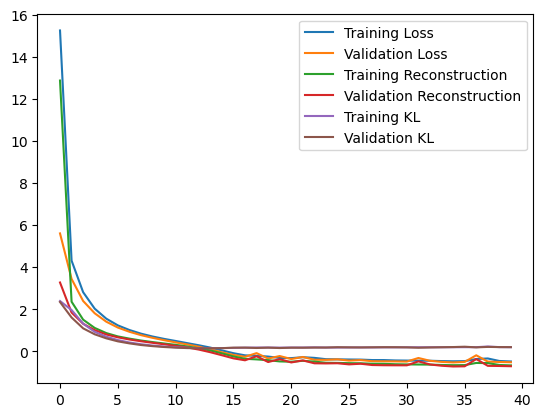

In [7]:
# Model initialization
model = DCVAE(
    T = 128,
    M = 12,
    cnn_units = [64, 64, 64, 64, 64, 64],
    dil_rate = [1, 2, 4, 8, 16, 32, 64],
    kernel = 2,
    strs = 1 ,
    batch_size = 32,
    J = 4,
    epochs = 100,
    learning_rate = 1e-4,
    lr_decay = False,
    name = "first_test",
    summary = True
    )   

# Train
with tf.device('/gpu:0'):
    model.fit(data_train, val_percent = 0.2, seed = 123) 

#Plot loss curves
plt.plot(model.history_.history["loss"], label="Training Loss")
plt.plot(model.history_.history["val_loss"], label="Validation Loss")
plt.plot(model.history_.history["reconst"], label="Training Reconstruction")
plt.plot(model.history_.history["val_reconst"], label="Validation Reconstruction")
plt.plot(model.history_.history["kl"], label="Training KL")
plt.plot(model.history_.history["val_kl"], label="Validation KL")

plt.legend()
plt.savefig(model.name + '_loss.jpg')

# Point operation

In [8]:
# Alpha definition
with tf.device('/gpu:0'):
    model.alpha_selection(False, data_train, labels_train, True)

# Results
print('Alpha up: ', model.alpha_up)
print('Alpha down: ', model.alpha_down) 
print('max_F1: ', model.f1_val) 

Alpha selection...
Alpha up:  [2. 2. 5. 5. 5. 5. 5. 3. 5. 2. 3. 5.]
Alpha down:  [2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 3. 2.]
max_F1:  [1.46934655e-01 2.63158221e-01 5.30363767e-01 5.70341386e-01
 1.48962298e-01 1.50155582e-01 3.79375563e-01 4.67195368e-01
 1.18098737e-01 2.62500976e-01 4.17789802e-01 5.34524288e-04]


# Validation

In [9]:
#Data train
path = "/home/gastong/Documentos/TELCO/v0/"
filenames = ["TELCO_data_2021_04.zip"]
labels_filenames = ["TELCO_labels_2021_04.zip"]

data_val = pd.DataFrame()
labels_val = pd.DataFrame()

for i in range(1):
    data_val = pd.concat([data_val, pd.read_csv(path+filenames[i])])
    labels_val = pd.concat([labels_val, pd.read_csv(path+labels_filenames[i])])

In [10]:
data_val = set_index(data_val)
data_val = preprocessing(dataRaw=data_val, flag_scaler=False, scaler=None, scaler_name=None,
                  outliers=True, max_std=7, instance='fit')

labels_val = set_index(labels_val)
labels_val = preprocessing(dataRaw=labels_val, flag_scaler=False, scaler=None, scaler_name=None,
                  outliers=False, max_std=7)

In [11]:
# Alpha definition
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(False,
                                                            data_val,
                                                            only_predict=False,
                                                            load_alpha=False
                                                    )
th_d = reconst - model.alpha_down*sig
th_u = reconst + model.alpha_up*sig

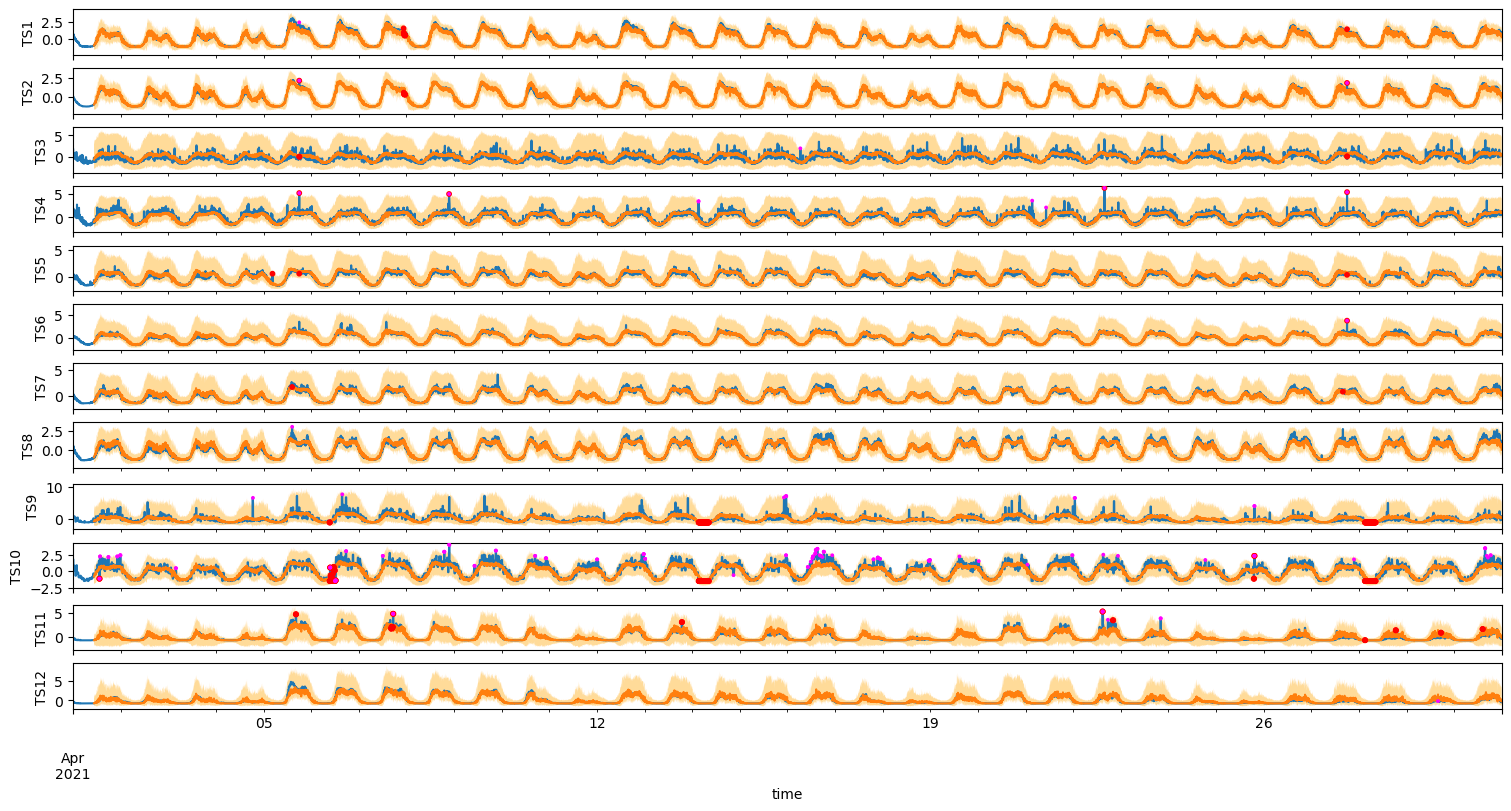

In [19]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        reconst[reconst.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(reconst[reconst.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]][model.T-1:].index,
                y=data[data.columns[count]][model.T-1:].values,
                s=3*anom[anom.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1

# A fallen series

### 1 fallen

In [63]:
data_val_falen_1 = data_val.copy()
data_val_falen_1["TS1"] = 0

In [64]:
# Alpha definition
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(False,
                                                            data_val_falen_1,
                                                            only_predict=False,
                                                            load_alpha=False
                                                    )
th_d = reconst - model.alpha_down*sig
th_u = reconst + model.alpha_up*sig

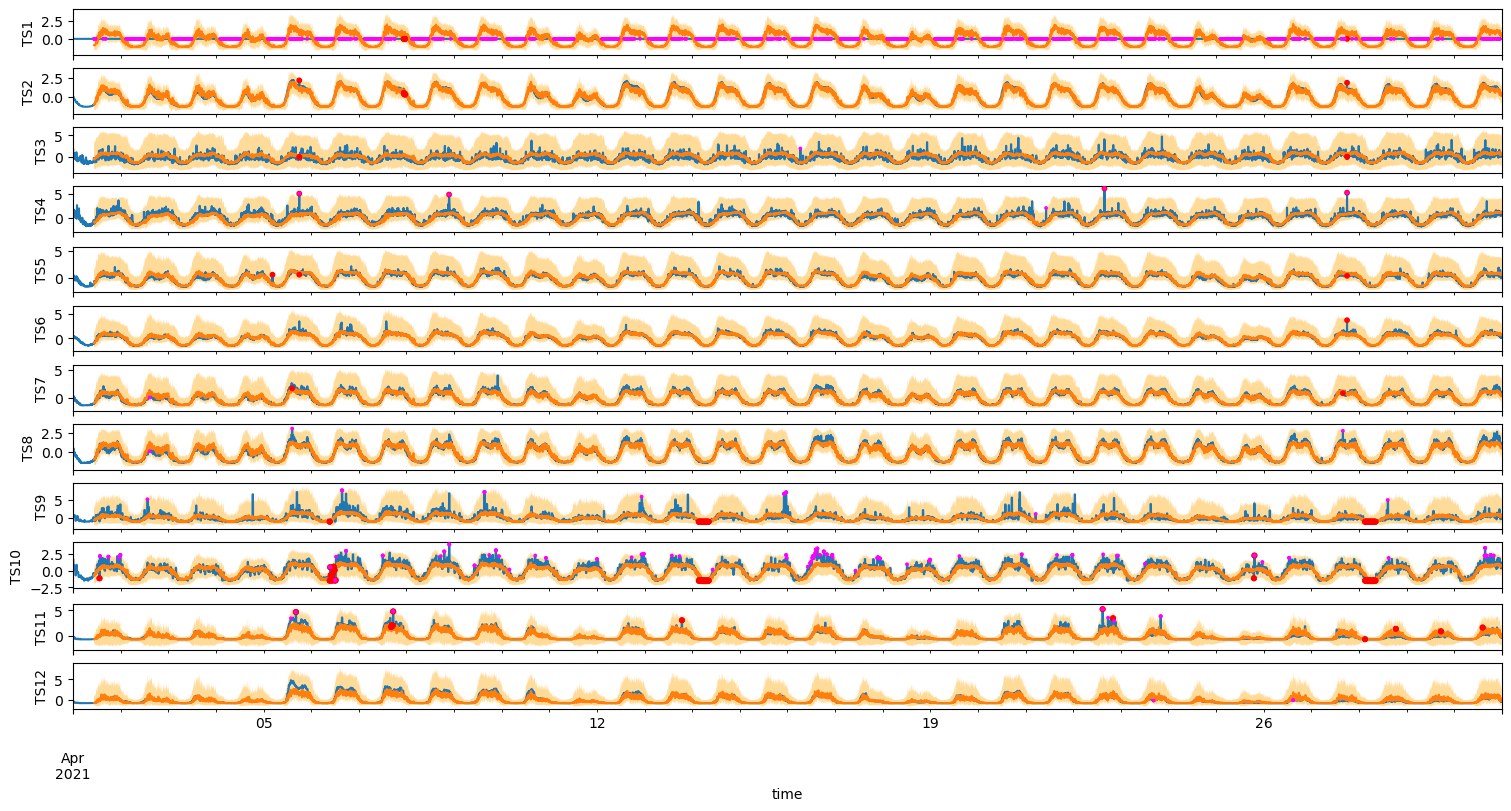

In [65]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val_falen_1.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        reconst[reconst.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(reconst[reconst.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]][model.T-1:].index,
                y=data[data.columns[count]][model.T-1:].values,
                s=3*anom[anom.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1

# 2 fallen


In [66]:
data_val_falen_2 = data_val.copy()
data_val_falen_2.iloc[:, 2:4] = 0

In [67]:
# Alpha definition
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(False,
                                                            data_val_falen_2,
                                                            only_predict=False,
                                                            load_alpha=False
                                                    )
th_d = reconst - model.alpha_down*sig
th_u = reconst + model.alpha_up*sig

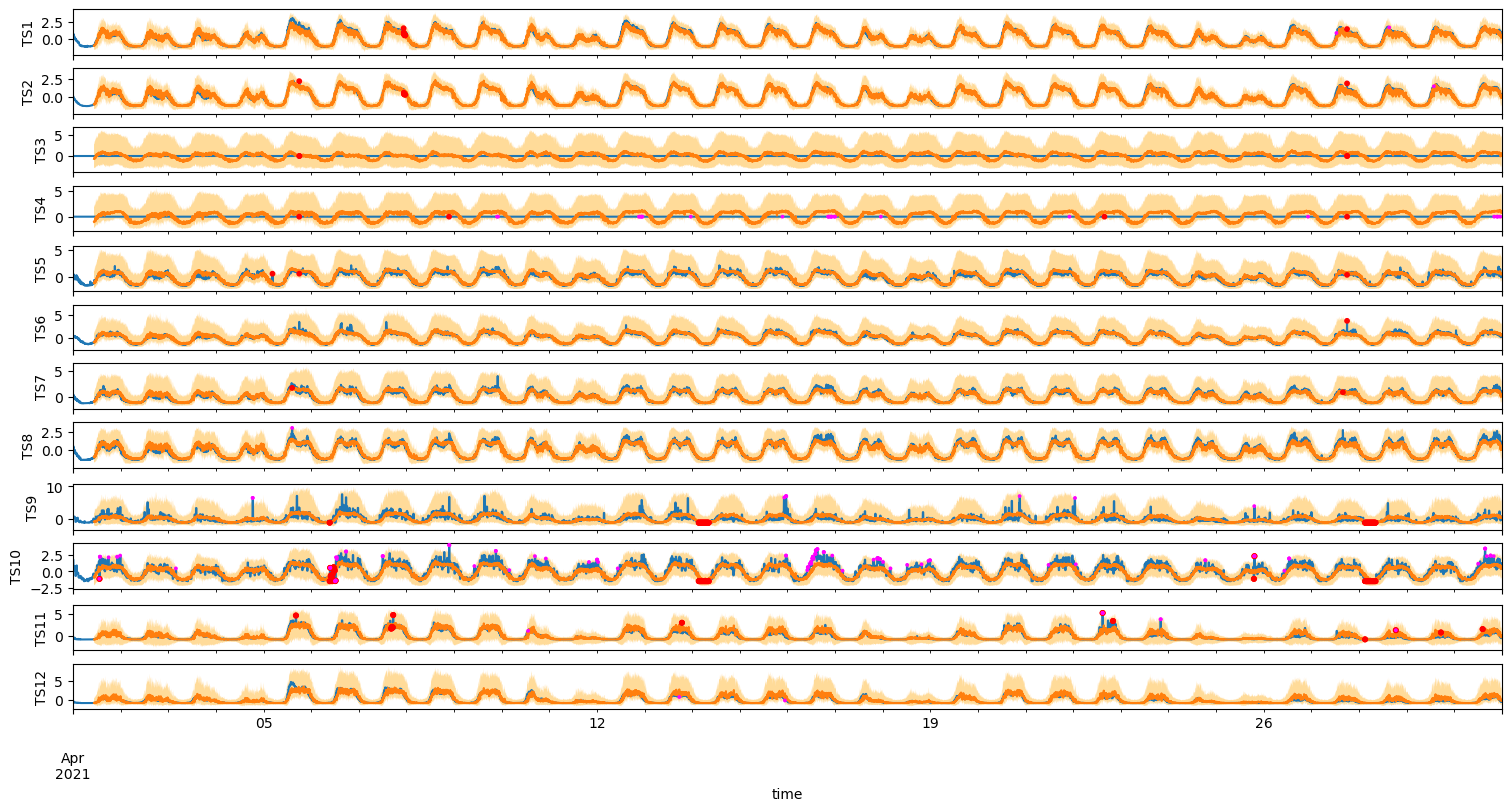

In [68]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val_falen_2.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        reconst[reconst.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(reconst[reconst.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]][model.T-1:].index,
                y=data[data.columns[count]][model.T-1:].values,
                s=3*anom[anom.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1

# 3 fallen


In [51]:
data_val_falen_3 = data_val.copy()
data_val_falen_3.iloc[:, :3] = 0

In [52]:
# Alpha definition
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(False,
                                                            data_val_falen_3,
                                                            only_predict=False,
                                                            load_alpha=False
                                                    )
th_d = reconst - model.alpha_down*sig
th_u = reconst + model.alpha_up*sig

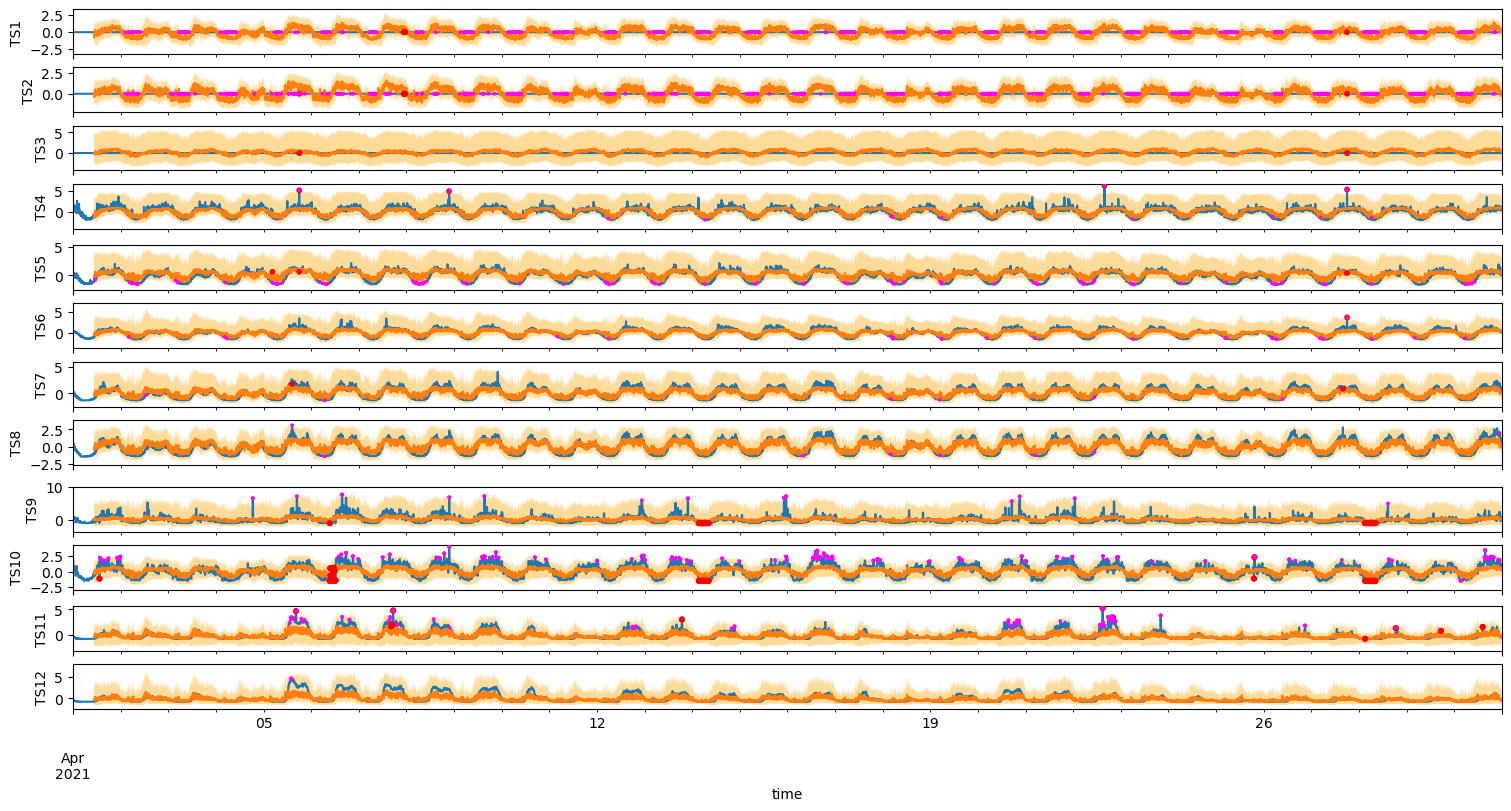

In [53]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val_falen_3.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        reconst[reconst.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(reconst[reconst.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]][model.T-1:].index,
                y=data[data.columns[count]][model.T-1:].values,
                s=3*anom[anom.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1

# 4 fallen


In [54]:
data_val_falen_4 = data_val.copy()
data_val_falen_4.iloc[:, :4] = 0

In [55]:
# Alpha definition
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(False,
                                                            data_val_falen_4,
                                                            only_predict=False,
                                                            load_alpha=False
                                                    )
th_d = reconst - model.alpha_down*sig
th_u = reconst + model.alpha_up*sig

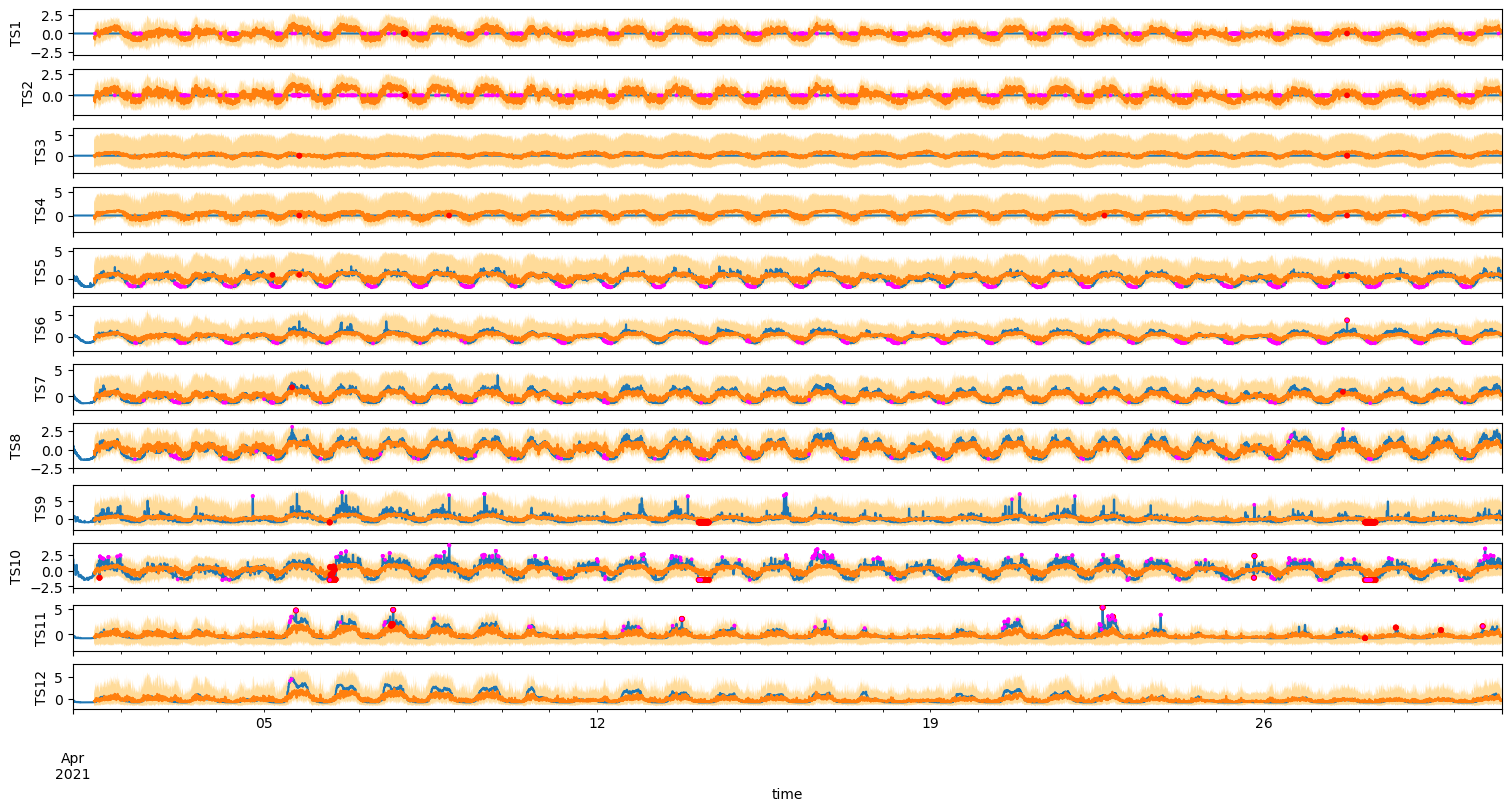

In [56]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val_falen_4.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        reconst[reconst.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(reconst[reconst.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]][model.T-1:].index,
                y=data[data.columns[count]][model.T-1:].values,
                s=3*anom[anom.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1

### Multi fallen

In [35]:
data_val_falen_multi = data_val.copy()
data_val_falen_multi.iloc[:, 1:] = 0

In [36]:
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(False,
                                                            data_val_falen_multi,
                                                            only_predict=False,
                                                            load_alpha=False
                                                    )
th_d = reconst - model.alpha_down*sig
th_u = reconst + model.alpha_up*sig

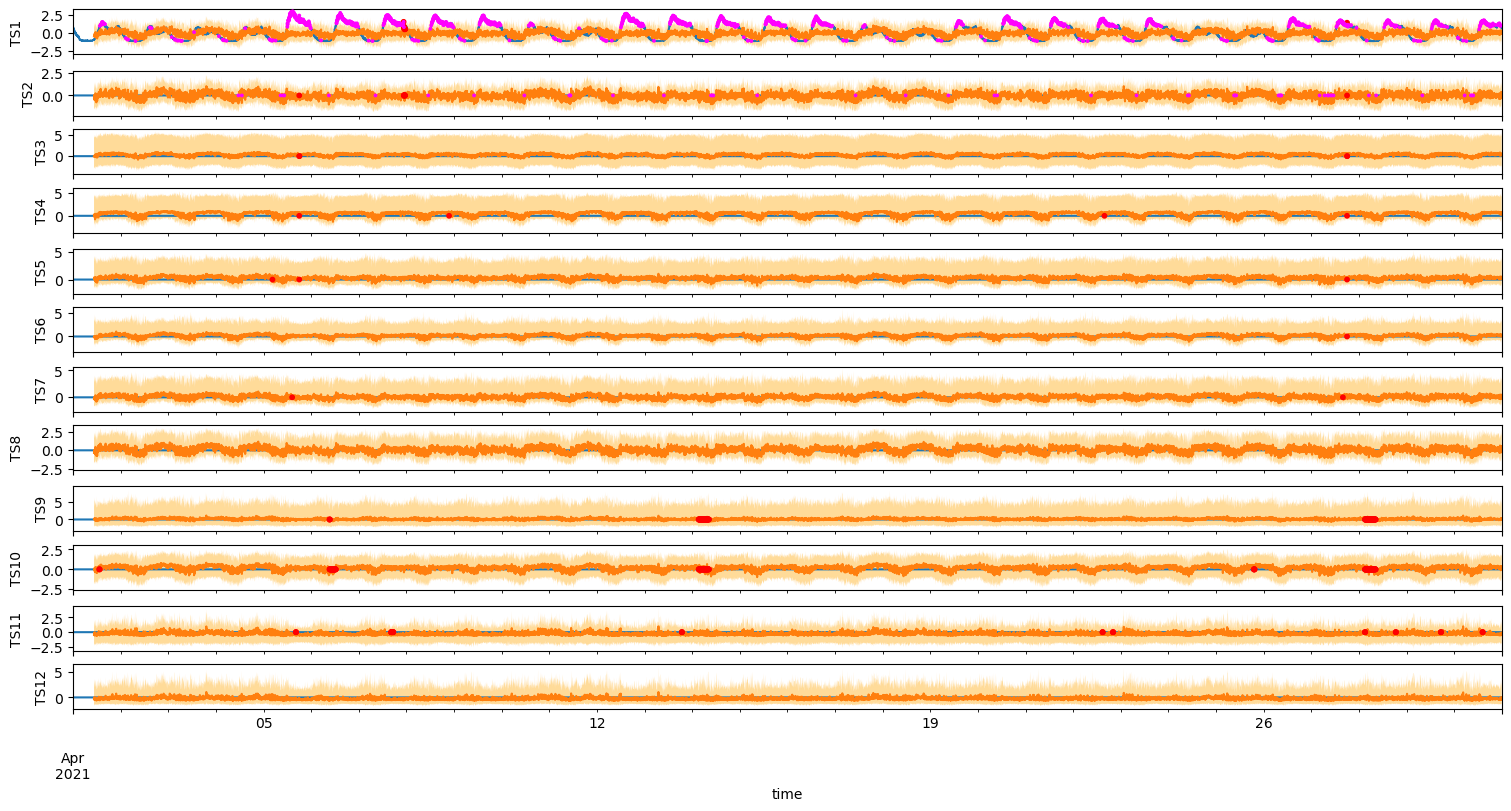

In [38]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val_falen_multi.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        reconst[reconst.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(reconst[reconst.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]][model.T-1:].index,
                y=data[data.columns[count]][model.T-1:].values,
                s=3*anom[anom.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1

# Shift series

In [81]:
data_val_shift = data_val[["TS4", "TS10", "TS1", "TS8", "TS2", "TS12", "TS11", "TS3", "TS5", "TS7", "TS9", "TS6"]].copy()

In [82]:
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(False,
                                                            data_val_shift,
                                                            only_predict=False,
                                                            load_alpha=False
                                                    )
th_d = reconst - model.alpha_down*sig
th_u = reconst + model.alpha_up*sig

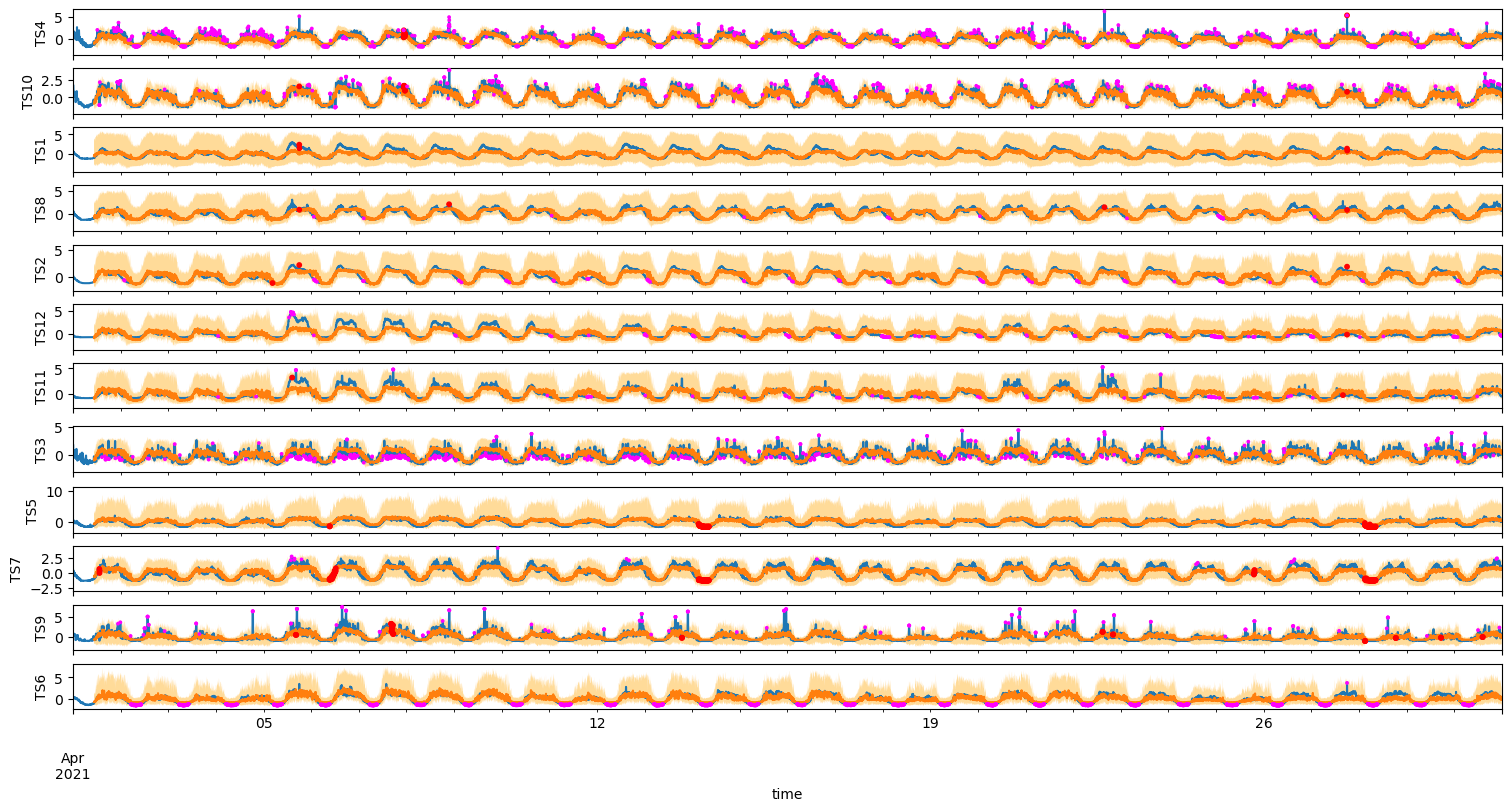

In [84]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val_shift.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        reconst[reconst.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(reconst[reconst.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]][model.T-1:].index,
                y=data[data.columns[count]][model.T-1:].values,
                s=3*anom[anom.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1

# Nans

In [112]:
data_val_nans = data_val.copy()
data_val_nans.iloc[2:3, :1] = None

In [113]:
data_val_nans

TS1       TS2       TS3       TS4       TS5  \
time                                                                    
2021-04-01 00:00:00  0.679751  0.175532  1.887025  1.273144  0.471111   
2021-04-01 00:05:00  0.771517  0.048242  1.887025  0.709404  0.655207   
2021-04-01 00:10:00       NaN  0.084930 -0.097601  1.896178  0.216361   
2021-04-01 00:15:00  0.511413 -0.044593 -0.097601  0.713247  0.143789   
2021-04-01 00:20:00  0.594039 -0.076176  0.243252  1.397756  0.026353   
...                       ...       ...       ...       ...       ...   
2021-04-30 23:35:00  0.872900  0.360565  0.178326  1.364939  0.169353   
2021-04-30 23:40:00  0.833591  0.300908  0.666370  0.669039 -0.006152   
2021-04-30 23:45:00  0.949525  0.328344  0.666370  0.562610  0.236280   
2021-04-30 23:50:00  0.869531  0.291656  0.130115  0.465348  0.456197   
2021-04-30 23:55:00  0.622863  0.216686  0.130115  1.231519  0.103518   

                          TS6       TS7       TS8       TS9      TS10  \
time                                                                    
2021-04-01 00:00:00  0.541007  0.490032  0.612087  0.252605  1.779569   
2021-04-01 00:05:00  0.409631  0.159077  0.315545  0.252605  1.779569   
2021-04-01 00:10:00  0.423939  0.256986  0.463816  0.252605  1.779569   
2021-04-01 00:15:00  0.280856  0.366791  0.510150  0.822434  0.810097   
2021-04-01 00:20:00  0.232727 -0.045361  0.028270  0.822434  0.810097   
...                       ...       ...       ...       ...       ...   
2021-04-30 23:35:00  0.230126  0.727749  0.843760 -0.171614  0.369428   
2021-04-30 23:40:00  0.152080  0.615631  0.714023 -0.171614  0.369428   
2021-04-30 23:45:00  0.284758  0.729458  0.843760  0.875887  1.250766   
2021-04-30 23:50:00  0.327683  0.472550  0.686222  0.875887  1.250766   
2021-04-30 23:55:00  0.295164  0.765940  0.732557  0.875887  1.250766   

                         TS11      TS12  
time                                     
2021-04-01 00:00:00 -0.220352 -0.234552  
2021-04-01 00:05:00 -0.220352 -0.234552  
2021-04-01 00:10:00 -0.220352 -0.234552  
2021-04-01 00:15:00 -0.530217 -0.574818  
2021-04-01 00:20:00 -0.530217 -0.574818  
...                       ...       ...  
2021-04-30 23:35:00 -0.290221 -0.341492  
2021-04-30 23:40:00 -0.290221 -0.341492  
2021-04-30 23:45:00 -0.439869 -0.477599  
2021-04-30 23:50:00 -0.439869 -0.477599  
2021-04-30 23:55:00 -0.439869 -0.477599  

[8640 rows x 12 columns]

In [114]:
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(False,
                                                            data_val_nans,
                                                            only_predict=False,
                                                            load_alpha=False
                                                    )
th_d = reconst - model.alpha_down*sig
th_u = reconst + model.alpha_up*sig

In [117]:
reconst

TS1       TS2       TS3       TS4       TS5  \
time                                                                    
2021-04-01 10:35:00       NaN       NaN       NaN       NaN       NaN   
2021-04-01 10:40:00       NaN       NaN       NaN       NaN       NaN   
2021-04-01 10:45:00       NaN       NaN       NaN       NaN       NaN   
2021-04-01 10:50:00 -0.867453 -0.822122 -0.343831 -0.812282 -0.911227   
2021-04-01 10:55:00 -0.840621 -0.781510 -0.388821 -0.877598 -0.798572   
...                       ...       ...       ...       ...       ...   
2021-04-30 23:35:00  0.412499  0.208551  0.777919  1.058843  0.555849   
2021-04-30 23:40:00  0.526909  0.331963  0.600544  1.159113  0.686887   
2021-04-30 23:45:00  0.516193  0.402343  0.738806  1.174718  0.735311   
2021-04-30 23:50:00  0.231855  0.036158  0.415204  0.898418  0.604603   
2021-04-30 23:55:00  0.488511  0.182732  0.690094  1.178997  0.795124   

                          TS6       TS7       TS8       TS9      TS10  \
time                                                                    
2021-04-01 10:35:00       NaN       NaN       NaN       NaN       NaN   
2021-04-01 10:40:00       NaN       NaN       NaN       NaN       NaN   
2021-04-01 10:45:00       NaN       NaN       NaN       NaN       NaN   
2021-04-01 10:50:00 -0.775067 -0.797892 -0.835599 -0.531271 -0.519007   
2021-04-01 10:55:00 -0.740742 -0.829473 -0.760339 -0.495037 -0.612059   
...                       ...       ...       ...       ...       ...   
2021-04-30 23:35:00  0.435949  0.368946  0.587332  0.339583  0.588399   
2021-04-30 23:40:00  0.689555  0.398120  0.444567  0.490589  0.653155   
2021-04-30 23:45:00  0.726603  0.573938  0.634557  0.595594  0.710320   
2021-04-30 23:50:00  0.805428  0.149482  0.190092  0.540429  0.753503   
2021-04-30 23:55:00  0.752037  0.419546  0.557260  0.494084  0.840287   

                         TS11      TS12  
time                                     
2021-04-01 10:35:00       NaN       NaN  
2021-04-01 10:40:00       NaN       NaN  
2021-04-01 10:45:00       NaN       NaN  
2021-04-01 10:50:00 -0.675004 -0.685429  
2021-04-01 10:55:00 -0.682185 -0.671630  
...                       ...       ...  
2021-04-30 23:35:00 -0.193077 -0.175591  
2021-04-30 23:40:00 -0.167802 -0.188493  
2021-04-30 23:45:00  0.109881 -0.036968  
2021-04-30 23:50:00 -0.057277 -0.093887  
2021-04-30 23:55:00 -0.169581 -0.171173  

[8513 rows x 12 columns]

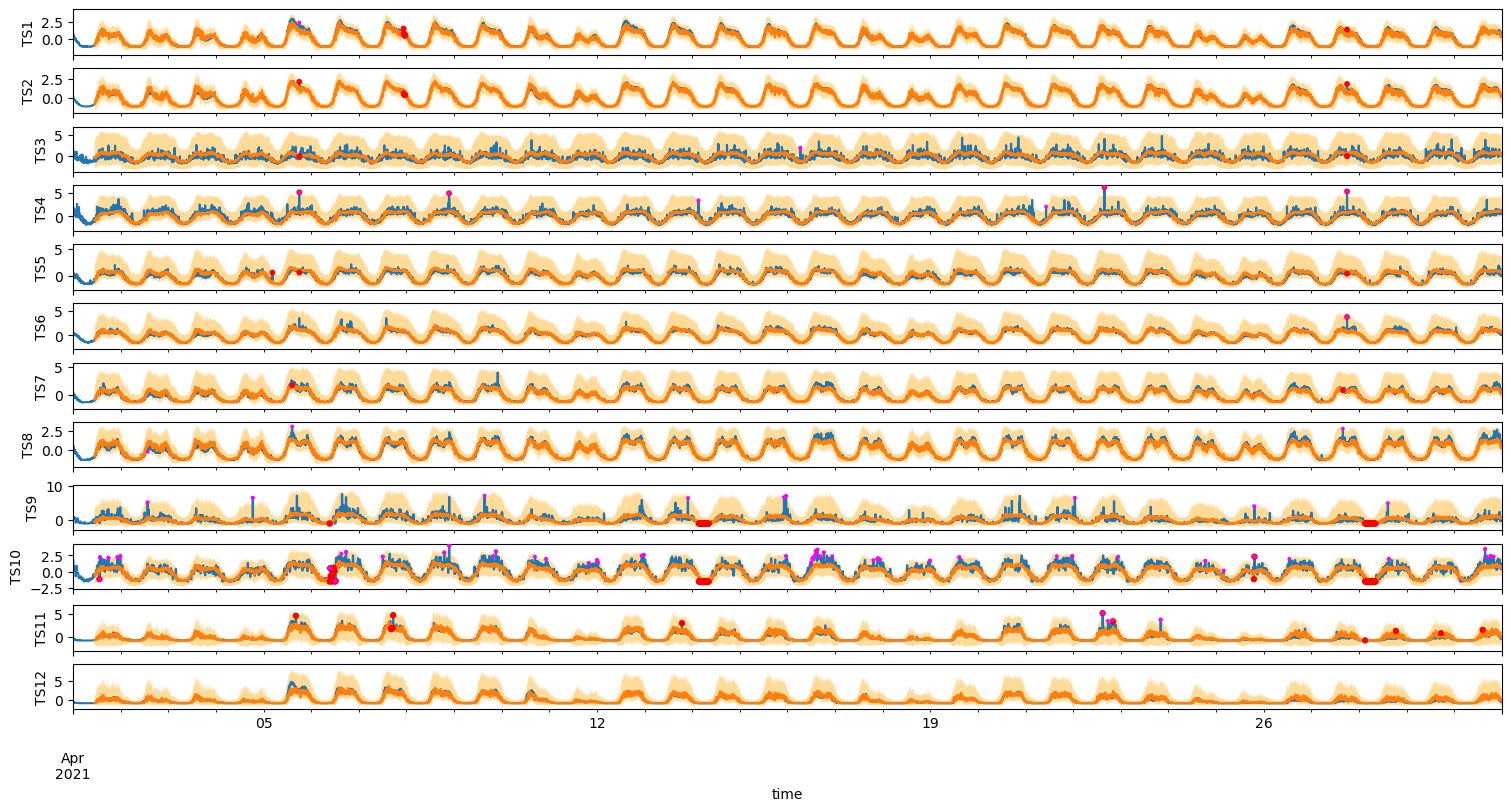

In [115]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val_nans.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        reconst[reconst.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(reconst[reconst.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]][model.T-1:].index,
                y=data[data.columns[count]][model.T-1:].values,
                s=3*anom[anom.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1